## First Movement: Periodic Defense with Poisson Attack Pattern

In [9]:
# Import required libraries
import networkx as nx 
import numpy as np
from scipy.special import factorial
from datetime import datetime
import logging
from scipy.stats import poisson
import sys
import os

In [10]:
import os

log_path = os.path.join(os.getcwd(), 'experiment_1.log')

if os.path.exists(log_path):
    os.remove(log_path)

logger = logging.getLogger()
handler = logging.FileHandler(log_path, mode='w')
handler.setFormatter(logging.Formatter('%(message)s'))
logger.addHandler(handler)
logger.setLevel(logging.INFO)

logger.info(f'[1] "experiment_1.log"')
logger.info(f'[1] "{datetime.now().strftime("%a %b %d %H:%M:%S %Y")}"')

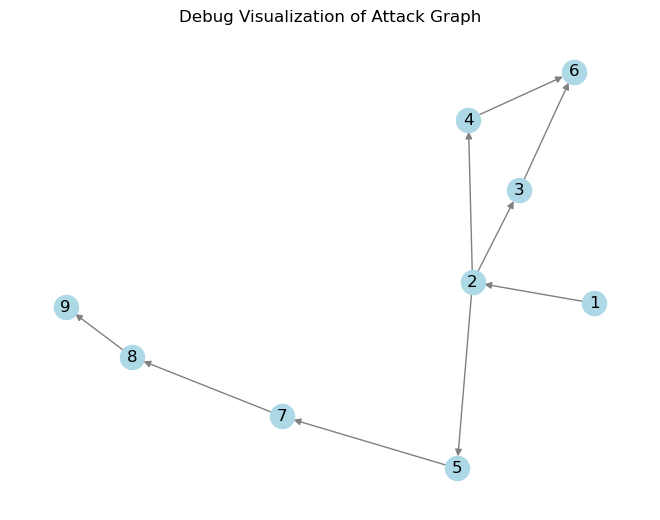

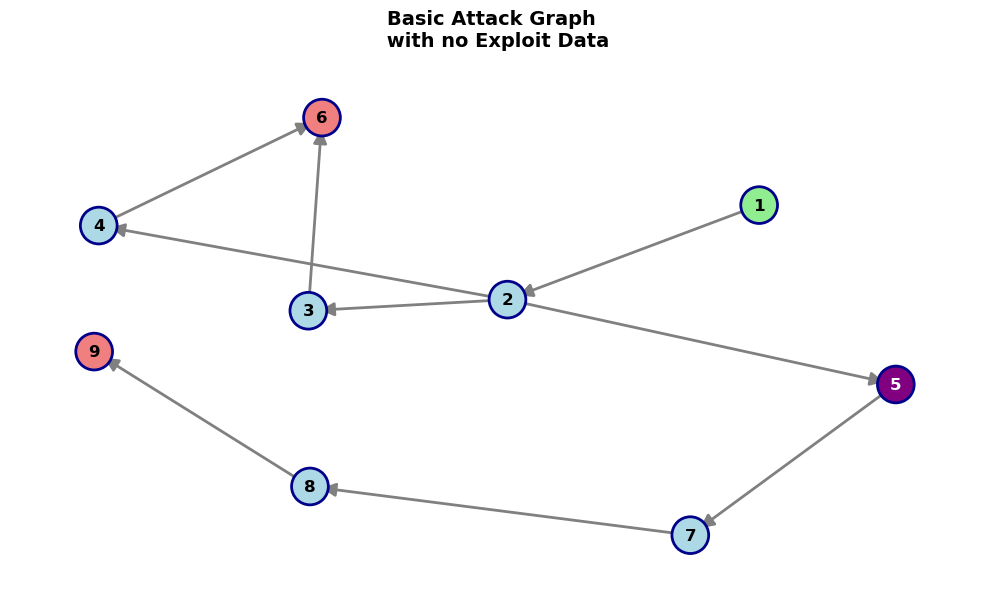

In [11]:
%run attack_graph_MARA.ipynb

### Use Poisson Distribution

Poisson distribution models attacker behavior with fixed defender checks:
- attack_rate (λ=2) represents average steps attacker takes between checks
- Higher λ shifts probability mass towards more steps
- Lower λ means attacker tends to take fewer steps
- Most likely: taking λ (or λ-1) steps
- defense_rate not needed since checks happen at known times

This fits our intuition: if attacker knows WHEN checks happen, they can plan 
their moves around these fixed times, caring only about their own speed (λ)

In [12]:
# Global configuration
DEFAULT_WEIGHT_VALUE = 0  # Can be changed to 1 if needed

In [13]:
attack_rate_list = [2]  
defense_rate_list = [0]

def random_steps(route, attack_rate=None, defense_rate=None, graph=None):
    length = len(route)
    if attack_rate is None:
        attack_rate = 2
    # Get PMF for values 0 to length-1
    pmf = poisson.pmf(np.arange(length), attack_rate)
    # Normalize (though poisson.pmf should already sum to ~1)
    pmf = pmf / pmf.sum()
    return pmf

In [14]:
# %run ctr-core_simple.ipynb
%run ctr-core_tests.ipynb
main()


After merging targets:
Nodes: [1, 2, 3, 4, 5, 7, 8, 'c(6,9)']
Edges with weights:
1 -> 2 (key=0) : 1
2 -> 3 (key=0) : 1
2 -> 4 (key=0) : 1
2 -> 5 (key=0) : 1
3 -> c(6,9) (key=0) : 1
4 -> c(6,9) (key=0) : 1
5 -> 7 (key=0) : 1
7 -> 8 (key=0) : 1
8 -> c(6,9) (key=0) : 1

=== Debug: Final Payoff Matrix ===
Matrix dimensions: 6 x 3

Payoff Matrix (probability of reaching target):
Row  1: 0.111111 0.111111 0.212865
Row  2: 0.000000 0.177778 0.228739
Row  3: 0.177778 0.000000 0.228739
Row  4: 0.177778 0.177778 0.177778
Row  5: 0.177778 0.177778 0.111111
Row  6: 0.177778 0.177778 0.000000

=== End Debug: Final Payoff Matrix ===



In [15]:
with open('experiment_1.log', 'r') as f:
    print(f.read())

[1] "experiment_1.log"
[1] "Wed Feb 26 16:15:04 2025"

++++++++++++++++++++++++++++++++

The virtual target nodeID is c(6,9)

attack rate =  2 , defense rate =  0 

	equilibrium for multiobjective security game (MOSG)

optimal defense strategy:
         prob.
2 0.000000e+00
3 2.798527e-01
4 2.798527e-01
5 0.000000e+00
7 0.000000e+00
8 4.402946e-01

worst case attack strategies per goal:
          1
1 0.3600737
2 0.3600737
3 0.2798527
[1] 0.128

Defender can keep attacker success below: 0.128
Attacker can guarantee success probability of: 0.128

